<font color='red'>
Grade: A
    
Problem 1: 
    
Part (a): Good
    
Part (b): Good  
    
Part (c): Good    
    
Problem 2
    
Part (a): Good
    
Part (b): Good    
    
Problem 3
    
Part (a): Good
    
Part (b): Good
    
Part (c): Good
    
Part (d): Good

In [1]:
#Import library

import numpy as np
import scipy as sp
import pandas as pd
import sklearn.linear_model
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, precision_recall_curve, auc

## Problem 1

In [2]:
#Check Working directory location
import os
print(os.getcwd())

/Users/yaningliu/OneDrive - The University of Colorado Denver/CUDenver_Courses/MATH40275027_MachineLearning_Spring2021/Homework/StudentHW/HW3-Sec001


In [3]:
#Read file and set column names
p1df = pd.read_table('Data/HW3P1.txt',  delimiter=' ', names=["x1","x2","y"])

#look at the head and count of the dataset
p1df.head()
p1df.count()

x1    51
x2    51
y     51
dtype: int64

#### (1a) Plot the training data, each class with a different color and marker

x1    21
x2    21
y     21
dtype: int64
x1    30
x2    30
y     30
dtype: int64


Text(0.5, 1.0, 'x1 and x2 values of class One and class Zero')

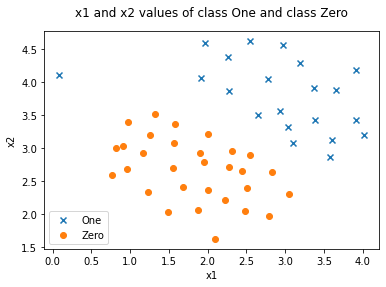

In [4]:
#Split the df into two classes based on label 1 and 0
One = p1df[p1df['y'] == 1]
Zero = p1df[p1df['y'] == 0]
#Check count
print(One.count())
print(Zero.count())

plt.scatter(One['x1'], One['x2'], label = 'One', marker = 'x')
plt.scatter(Zero['x1'], Zero['x2'], label = 'Zero', marker = 'o')
plt.legend(loc = 'lower left')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('x1 and x2 values of class One and class Zero', pad = 15)

#### (1b) Build two linear SVM classifiers, one with  𝐶=1  and one with  𝐶=100 . Plot the decision boundary for each case along with the training data.

In [5]:
# Build linear svm classifier with c=1 and c=100
# Build a pipeline that first scales data and then trains the model

svm_clf_c1 = Pipeline([
    ("scaler_c1", StandardScaler()),
    ("linear_svc_c1", LinearSVC(C=1, loss="hinge", random_state=1)),
])

svm_clf_c100 = Pipeline([
    ("scaler_c100", StandardScaler()),
    ("linear_svc_c100", LinearSVC(C=100, loss="hinge", random_state=100, max_iter=100000)),
])

In [6]:
# Define X features (use first 2 columns) and y response (last column)
X = p1df.iloc[:, :2]
y = p1df.iloc[:, -1]

In [7]:
# Train the model with the two classifiers defined

svm_clf_c1.fit(X, y)
svm_clf_c100.fit(X, y)

Pipeline(steps=[('scaler_c100', StandardScaler()),
                ('linear_svc_c100',
                 LinearSVC(C=100, loss='hinge', max_iter=100000,
                           random_state=100))])

Text(0.5, 1.0, 'Decision Boundaries for SVM models where C=1 and C=100')

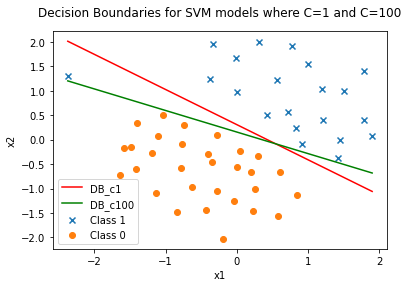

In [8]:
# Plot decision boundary

# Set X-axis with scaled X
X_scaled = svm_clf_c1["scaler_c1"].transform(X) # scale the x values
x_db = [X_scaled[:,0].min(), X_scaled[:,0].max()] # set x-axis range using the scaled x1's min and max

#Find DB for the SVM model with C=1
beta0_c1 = svm_clf_c1["linear_svc_c1"].intercept_[0] # extract beta 0 from the linear svc model
beta1_c1 = svm_clf_c1["linear_svc_c1"].coef_[0][0] # extract beta 1
beta2_c1 = svm_clf_c1["linear_svc_c1"].coef_[0][1] # extract beta 2
y_db_c1 = - (beta0_c1 + np.dot(beta1_c1, x_db)) / beta2_c1 # to find db we set linear function's y to zero then solve for x2

#Find DB for the SVM model with C=100
beta0_c100 = svm_clf_c100["linear_svc_c100"].intercept_[0]
beta1_c100 = svm_clf_c100["linear_svc_c100"].coef_[0][0] 
beta2_c100 = svm_clf_c100["linear_svc_c100"].coef_[0][1] 
y_db_c100 = - (beta0_c100 + np.dot(beta1_c100, x_db)) / beta2_c100 

#Within X_scaled, Filter out class 1, use first column as x-values in plot, 2nd column as y-values in plot
plt.scatter(X_scaled[p1df["y"]==1, 0], X_scaled[p1df["y"]==1, 1], marker='x', label='Class 1')
#Within X_scaled, Filter out class 0, use first column as x-values in plot, 2nd column as y-values in plot
plt.scatter(X_scaled[p1df["y"]==0, 0], X_scaled[p1df["y"]==0, 1], marker='o', label='Class 0')
#Plot decision boundaries for SVM models where C=1 and C=100
plt.plot(x_db, y_db_c1, label="DB_c1", c='r')
plt.plot(x_db, y_db_c100, label="DB_c100", c='g')
plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Decision Boundaries for SVM models where C=1 and C=100', pad = 15)

#### (1c) Interpretate what leads to the different behavior of the two models (and thus the decision boundaries)

Ans: C is the regularization parameter for SVM models. When C is small, we tolerate more errors on the wrong side/inside of margin and tend towards underfitting. When c=1, we see that there is one class 1 point on the wrong side. It is because that point is like an outlier. In order to make the model generalize well and not overfit, we tolerate the error.
When C is big, we have less tolerance with errors. The bigger C gets, the closer we get to a hard margin and tend towards overfitting. Therefore, we see that when c=100, the previous error/outlier point is not tolerated and forced out.

## Problem 2

In [9]:
#Read file and set column names
p2df = pd.read_table('Data/HW3P2.txt',  delimiter=' ', names=["x1","x2","y"])

#look at the head and count of the dataset
p2df.head()
p2df.count()

x1    863
x2    863
y     863
dtype: int64

#### (2a) Plot the training data, each class with a different color and marker. Is the dataset linearly separable?

No, the dataset is not linearly separable. See plot below.

x1    480
x2    480
y     480
dtype: int64
x1    383
x2    383
y     383
dtype: int64


Text(0.5, 1.0, 'x1 and x2 values of class One and class Zero')

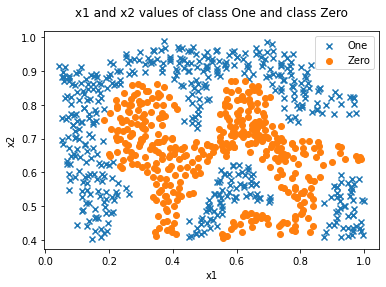

In [10]:
#Split the df into two classes based on label 1 and 0
One = p2df[p2df['y'] == 1]
Zero = p2df[p2df['y'] == 0]
#Check count
print(One.count())
print(Zero.count())

plt.scatter(One['x1'], One['x2'], label = 'One', marker = 'x')
plt.scatter(Zero['x1'], Zero['x2'], label = 'Zero', marker = 'o')
plt.legend(loc = 'upper right')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('x1 and x2 values of class One and class Zero', pad = 15)

#### (2b) Train a SVM using the RBF kernel. Adjust the parameter C to learn a decision boundary that performs well. Plot the decsion boundary.

In [11]:
# Define X features (use first 2 columns) and y response (last column)
X = p2df.iloc[:, :2]
y = p2df.iloc[:, -1]

kernel_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", coef0=3, C=100))
])
kernel_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()), ('svm_clf', SVC(C=100, coef0=3))])

Text(0.5, 1.0, 'Decision Boundaries for SVM models using RBF kernel where C=100')

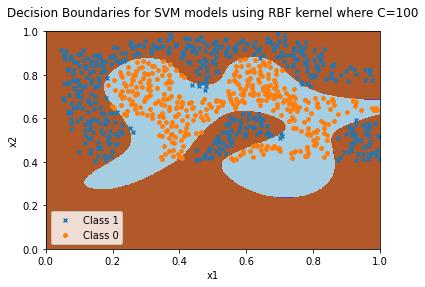

In [12]:
# Plot the decision boundary

# generate grid
x1 = np.linspace(0, 1, 400)
x2 = np.linspace(0, 1, 400)
X1, X2 = np.meshgrid(x1,x2)

# flatten X1 and X2
r1, r2 = X1.flatten(), X2.flatten() #shape = (160k,)

# make r1 and r2 2D
r1, r2 = r1.reshape((len(r1),1)), r2.reshape((len(r2),1)) #shape = (160k,1)

# horizontally stack r1 and r2
grid = np.hstack((r1,r2)) #shape = (160k,2)

# now grid is a feature matrix
# get predicted labels for grid
yhat = kernel_clf.predict(grid) #for each combination of x1 and x2 in the grid, predict 1 or 0 using defined model

# reshape yhat so that it has the same shape as X1 and X2 (which is 400,400 here)
ZZ = yhat.reshape(X1.shape)

# Plot contour graph with 2 color based on ZZ/yhat's values
plt.contourf(X1, X2, ZZ, cmap = 'Paired')

#Within X, Filter out class 1, use first column as x-values in plot, 2nd column as y-values in plot
plt.scatter(One.iloc[:,0], One.iloc[:,1], marker='x', label='Class 1', s=15)
#Within X, Filter out class 0, use first column as x-values in plot, 2nd column as y-values in plot
plt.scatter(Zero.iloc[:,0], Zero.iloc[:,1], marker='o', label='Class 0', s=15)
plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Decision Boundaries for SVM models using RBF kernel where C=100', pad = 15)

## Problem 3

#### (3a) Prepare the data. Get the feature matrix, target vector (good wines are labled 1, and 0 for bad wines). Also note that the data are separated by ";". Split the data into training and testing parts using train_test_split (). Set the parameters so that  20%  of the data are used as test data. Also set the random_state to 30, so that everyone gets the same splitting

In [13]:
# Read file
p3df = pd.read_csv('Data/winequality-red.csv',  delimiter=';')

# see head to check
p3df.head()

# Convert pd dataframe to numpy array
p3np = p3df.to_numpy()

# Define X feature matrix
X = p3np[:, :-1]

# Define y with 1 (quality >5) and 0 (quality =< 5)
y = (p3np[:,-1] >5).astype(np.int)

# Split data into training/test set. Use 20% for test set, with random state =30
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=30)


#### (3b) Build a logistic regression model for your training data. Use all default parameters, except setting solver to 'liblinear'. Also scale the data before building the model. Report the precision, recall and F1 for the testing data

In [14]:
# Build a pipeline to scale the data and then run the logistic regression model
logi_reg = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(solver = 'liblinear'))
])

# Train the model
logi_reg.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', LogisticRegression(solver='liblinear'))])

In [15]:
# Make prediction using test set. No need to scale X_test coz done through pipeline

y_test_pred = logi_reg.predict(X_test)

In [16]:
# See accuracy score (just for the sake of it)
accuracy_score(y_test, y_test_pred)

0.765625

In [17]:
# See precision score
precision_score(y_test, y_test_pred)

0.7653631284916201

In [18]:
# See recall score
recall_score(y_test, y_test_pred)

0.8058823529411765

In [19]:
# See f1 score
f1_score(y_test, y_test_pred)

0.7851002865329514

#### (3c) Repeat Part (b) with a support vector classifier (remember to scale data before training too). Use all default parameters.

In [20]:
# Build a pipeline to scale the data and then run the logistic regression model
svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC())
])

# Train the model
svm_clf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC())])

In [21]:
# Make prediction using test set. No need to scale X_test coz done through pipeline

y_test_pred_2 = svm_clf.predict(X_test)

In [22]:
# See accuracy score (just for the sake of it)
accuracy_score(y_test, y_test_pred_2)

0.796875

In [23]:
# See precision score
precision_score(y_test, y_test_pred_2)

0.7777777777777778

In [24]:
# See recall score
recall_score(y_test, y_test_pred_2)

0.8647058823529412

In [25]:
# See f1 score
f1_score(y_test, y_test_pred_2)

0.818941504178273

#### (3d) Draw the ROC curves for both models from (b) and (c) on the same plot. Find the AUCs for both models too. Does one seem better than the other?

ANS: The SVC model is better as it gives better accuracy, precision, recall, f1 and AUC.

In [26]:
# Get test_scores of the two models

y_test_scores_log_reg = logi_reg.decision_function(X_test)
y_test_scores_svc = svm_clf.decision_function(X_test)

In [27]:
# Get roc_curve data

fpr, tpr, thresholds = roc_curve(y_test, y_test_scores_log_reg)
fpr2, tpr2, thresholds = roc_curve(y_test, y_test_scores_svc)

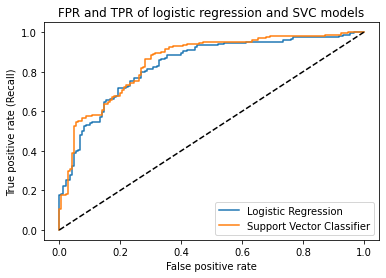

In [28]:
# Plot ROC curves of the two models

plt.plot(fpr, tpr, label ='Logistic Regression')
plt.plot(fpr2, tpr2, label = 'Support Vector Classifier')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate (Recall)')
plt.title('FPR and TPR of logistic regression and SVC models')
plt.legend()

In [29]:
# Get area under the curves (AUC) of the two models
print("AUC for the logistic regression model is", roc_auc_score(y_test, y_test_scores_log_reg))
print("AUC for the SVC model is", roc_auc_score(y_test, y_test_scores_svc))

AUC for the logistic regression model is 0.8351764705882353
AUC for the SVC model is 0.8536862745098039
